#Training A Regression Model Using Tensorflow 
(without tf.estimator)

As version of this tensorflow is as 2.3.0 and I am working on v1; hene disabling other behaviours
If you don't disable other versions you might face serious errors and issues 

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Here, we are creating very large dataset consisting of million data points with a single feature

In [ ]:
x_data = np.linspace(0.0,10.1,1000000)

Addking some noise to the data, so that model will try to learn more accurately

In [ ]:
noise = np.random.randn(len(x_data))

Considering line equation as y = mx+ b
where m = 0.5 and b=5

In [ ]:
y_true = (0.5 * x_data) + 5 + noise

Creating Dataframe 

In [ ]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])

In [ ]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [ ]:
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [ ]:
y_df.head()

,Y
0,6.741363
1,4.284310
2,5.973868
3,4.272675
4,4.961562


In [ ]:
df = pd.concat([x_df,y_df],axis =1)

In [ ]:
df.head()

,X Data,Y
0,0.00000,6.741363
1,0.00001,4.284310
2,0.00002,5.973868
3,0.00003,4.272675
4,0.00004,4.961562


To train such a large data at once containing million points is a big no!!
Always create batches of data and then train the model batch wise otherwise you might require a lot of time!!!

Rather than plotting all million points, we'll plot random 250 data points 

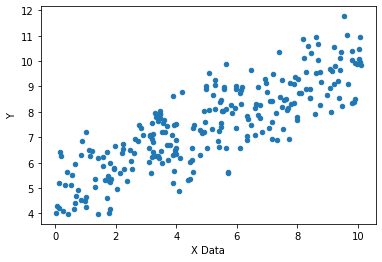

In [ ]:
df.sample(n=250).plot(kind ='scatter', x= "X Data", y='Y')

Creating batches of data, so that processing the model becomes easy

In [ ]:
batch_size =8

In [ ]:
np.random.randn(2)

array([-0.98423926, -1.12768636])

Initializing variables with random numbers 


In [ ]:
m = tf.Variable(0.98)
b = tf.Variable(1.12)

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
tf.executing_eagerly()

False

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Using placeholders for x & y 

In [ ]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

Defining Graphs

In [ ]:
y_model = m*xph +b

Introducing error and minizing the loss function using Gradient Descent Optimizer 

In [ ]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [ ]:
train = optimizer.minimize(error)

In [34]:
init = tf.global_variables_initializer()

Below we will be running these batches of data to train the model 

In [39]:
with tf.Session() as sess:
  sess.run(init)

  batches = 1000
  for i in range(batches):
    rand_index = np.random.randint(len(x_data),size = batch_size)
    feed = {xph : x_data[rand_index], yph : y_true[rand_index]}
    sess.run(train, feed_dict = feed)

  model_m, model_b =  sess.run([m,b])

Hooray! The model is been trained and now it's time to check the accuracy

The values of m should be 0.5 and b should be 5 as defined earlier ....

Please remember we started with values for m as 0.98 and b as 1.12 

In [40]:
model_m

0.49518034

As we can see, the value of m tends to 0.5 almost!

In [41]:
model_b

4.922052

And the value of b is near to 5

This means our model is been predicitng correctly ...

To get more accurate values; we need to increase the number of batches..


#HiGh Alert

Don't too much increase your number of batches, else it will OVERFIT your model

In [42]:
y_hat = x_data * model_m + model_b

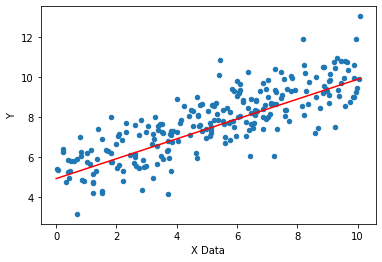

In [43]:
df.sample(n=250).plot(kind ='scatter', x='X Data', y='Y')
plt.plot(x_data,y_hat,'r')

As we can see, the blue line is 250 sample data points and red line plotted is our model.

Our model seems to fit pretty much!
Don't expect all points to collide with line as we have added noise!!